In [7]:
!pip install pyspark
import pyspark

In [8]:
spark = pyspark.sql.SparkSession.builder.appName("Adidas").getOrCreate()

####Problem Statement:
The objective of this project is to analyze the Adidas sales database for the year 2020 and 2021 using databricks and identify key insights to help improve sales performance and optimize business strategies. By analyzing the sales data, we aim to understand factors influencing sales, identify trends, and uncover opportunities for growth. The analysis will be conducted using Excel to provide an interactive and insightful dashboard.

Business Metrics requirements

1. Total Sales, Total Profit, Average Price per Unit, and Total Units Sold
2. Total sales by month
3. Total sales by state
4. total sales by region
5. Total sales by product
6. Total sales by retailer
7. Total Profit by Sales_Method
8. Top Performing Cities by Profit

In [9]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
df = spark.read.csv("/content/gdrive/MyDrive/Projects/Pyspark_projects/Adidas sales data Analysis", header=True, inferSchema=True)
df.show(3)

+-----------+-----------+------------+---------+--------+--------+--------------------+--------------+----------+-----------+----------------+----------------+------------+
|   Retailer|Retailer ID|Invoice Date|   Region|   State|    City|             Product|Price per Unit|Units Sold|Total Sales|Operating Profit|Operating Margin|Sales Method|
+-----------+-----------+------------+---------+--------+--------+--------------------+--------------+----------+-----------+----------------+----------------+------------+
|Foot Locker|    1185732|  01/01/2020|Northeast|New York|New York|Men's Street Foot...|        50.00 |     1,200|   600,000 |        300,000 |             50%|    In-store|
|Foot Locker|    1185732|  02/01/2020|Northeast|New York|New York|Men's Athletic Fo...|        50.00 |     1,000|   500,000 |        150,000 |             30%|    In-store|
|Foot Locker|    1185732|  03/01/2020|Northeast|New York|New York|Women's Street Fo...|        40.00 |     1,000|   400,000 |        14

In [11]:
df.createOrReplaceTempView("Sales")

In [14]:
spark.sql("select * from Sales").show(3)

+-----------+-----------+------------+---------+--------+--------+--------------------+--------------+----------+-----------+----------------+----------------+------------+
|   Retailer|Retailer ID|Invoice Date|   Region|   State|    City|             Product|Price per Unit|Units Sold|Total Sales|Operating Profit|Operating Margin|Sales Method|
+-----------+-----------+------------+---------+--------+--------+--------------------+--------------+----------+-----------+----------------+----------------+------------+
|Foot Locker|    1185732|  01/01/2020|Northeast|New York|New York|Men's Street Foot...|        50.00 |     1,200|   600,000 |        300,000 |             50%|    In-store|
|Foot Locker|    1185732|  02/01/2020|Northeast|New York|New York|Men's Athletic Fo...|        50.00 |     1,000|   500,000 |        150,000 |             30%|    In-store|
|Foot Locker|    1185732|  03/01/2020|Northeast|New York|New York|Women's Street Fo...|        40.00 |     1,000|   400,000 |        14

In [26]:
### 1. Total Sales, Total Profit, Average Price per Unit, and Total Units Sold
spark.sql("""
    SELECT
        SUM(`Total Sales`) AS Total_Sales,
        SUM(`Operating Profit`) AS Total_Profit,
        AVG(`Price per Unit`) AS Average_Price_per_Unit,
        SUM(`Units Sold`) AS Total_Units_Sold
    FROM Sales
""").show()

+-----------+------------+----------------------+----------------+
|Total_Sales|Total_Profit|Average_Price_per_Unit|Total_Units_Sold|
+-----------+------------+----------------------+----------------+
|   107905.0|    635412.0|     45.21662520729685|       2421491.0|
+-----------+------------+----------------------+----------------+



In [27]:
result_df = spark.sql("""
    SELECT
        SUM(`Total Sales`) AS Total_Sales,
        SUM(`Operating Profit`) AS Total_Profit,
        AVG(`Price per Unit`) AS Average_Price_per_Unit,
        SUM(`Units Sold`) AS Total_Units_Sold
    FROM Sales
""")

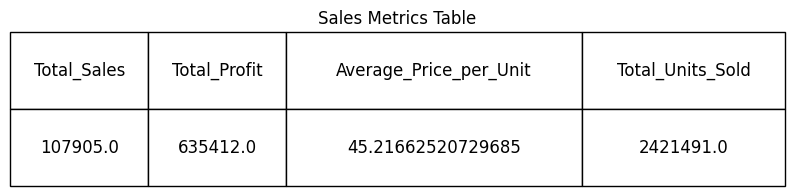

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming result_df is your Spark DataFrame from the SQL query
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = result_df.toPandas()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the size as needed

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=pandas_df.values,
                 colLabels=pandas_df.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])  # Adjust bbox for table size

# Adjust font size and other properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([0, 1, 2, 3])  # Adjust for number of columns

# Show the plot
plt.title('Sales Metrics Table')
plt.show()


In [43]:
### 2. Total sales by month
# Execute the SQL query
sales_by_month_df = spark.sql("""
    SELECT
        SUM(`Total Sales`) AS Total_Sales,
        month(to_date(`Invoice Date`, 'MM/dd/yyyy')) AS Month
    FROM Sales
    WHERE `Invoice Date` IS NOT NULL
    GROUP BY Month
    HAVING Month IS NOT NULL
    ORDER BY Month
""")

# Show the result
sales_by_month_df.show()



+-----------+-----+
|Total_Sales|Month|
+-----------+-----+
|      224.0|    1|
|     4219.0|    2|
|     6334.0|    3|
|      782.0|    4|
|     2806.0|    5|
|    12508.0|    6|
|     7932.0|    7|
|     6530.0|    8|
|     4426.0|    9|
|     4437.0|   10|
|     2180.0|   11|
|    10186.0|   12|
+-----------+-----+



<ipython-input-45-67d502a7373e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total_Sales', data=pandas_df, palette='viridis')


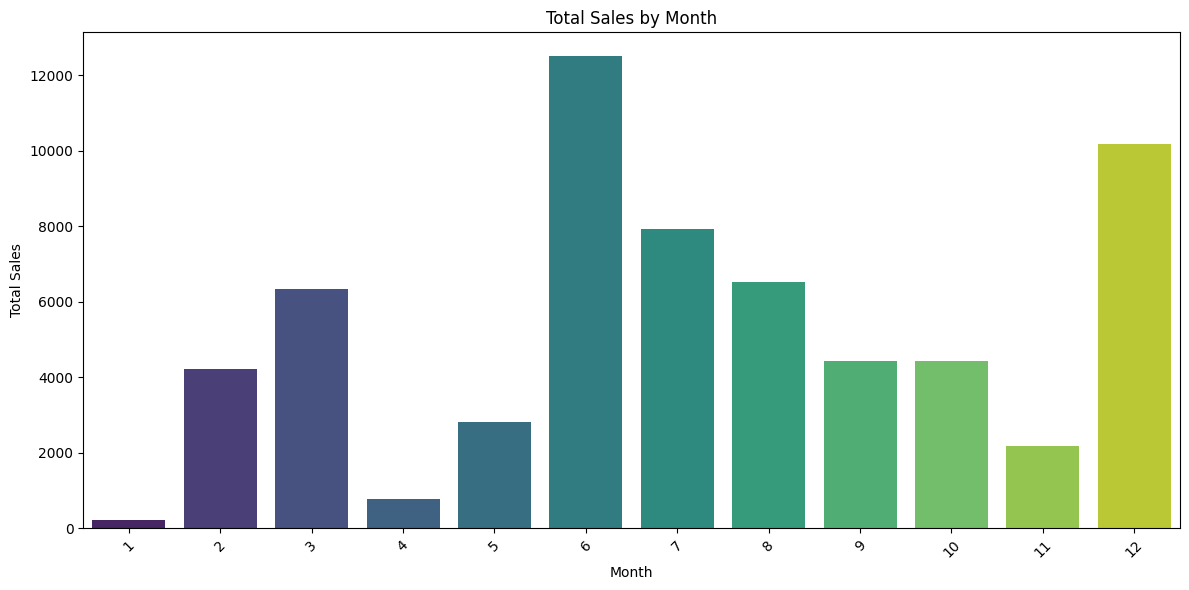

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = sales_by_month_df.toPandas()

# Drop rows where 'Month' is NaN
pandas_df = pandas_df.dropna(subset=['Month'])

# Convert 'Month' to integer if it's not already
pandas_df['Month'] = pandas_df['Month'].astype(int)

# Create a figure and axis
plt.figure(figsize=(12, 6))  # Adjust size as needed

# Create a bar plot
sns.barplot(x='Month', y='Total_Sales', data=pandas_df, palette='viridis')

# Add titles and labels
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()



In [55]:
### 2. Total sales by month Name
sales_by_month_df = spark.sql("""
    SELECT
        SUM(`Total Sales`) AS Total_Sales,
        date_format(to_date(`Invoice Date`, 'MM/dd/yyyy'), 'MMMM') AS Month
    FROM Sales
    WHERE `Invoice Date` IS NOT NULL
    GROUP BY Month
    HAVING Month IS NOT NULL
    ORDER BY Month
""")

sales_by_month_df.show()


+-----------+---------+
|Total_Sales|    Month|
+-----------+---------+
|      782.0|    April|
|     6530.0|   August|
|    10186.0| December|
|     4219.0| February|
|      224.0|  January|
|     7932.0|     July|
|    12508.0|     June|
|     6334.0|    March|
|     2806.0|      May|
|     2180.0| November|
|     4437.0|  October|
|     4426.0|September|
+-----------+---------+



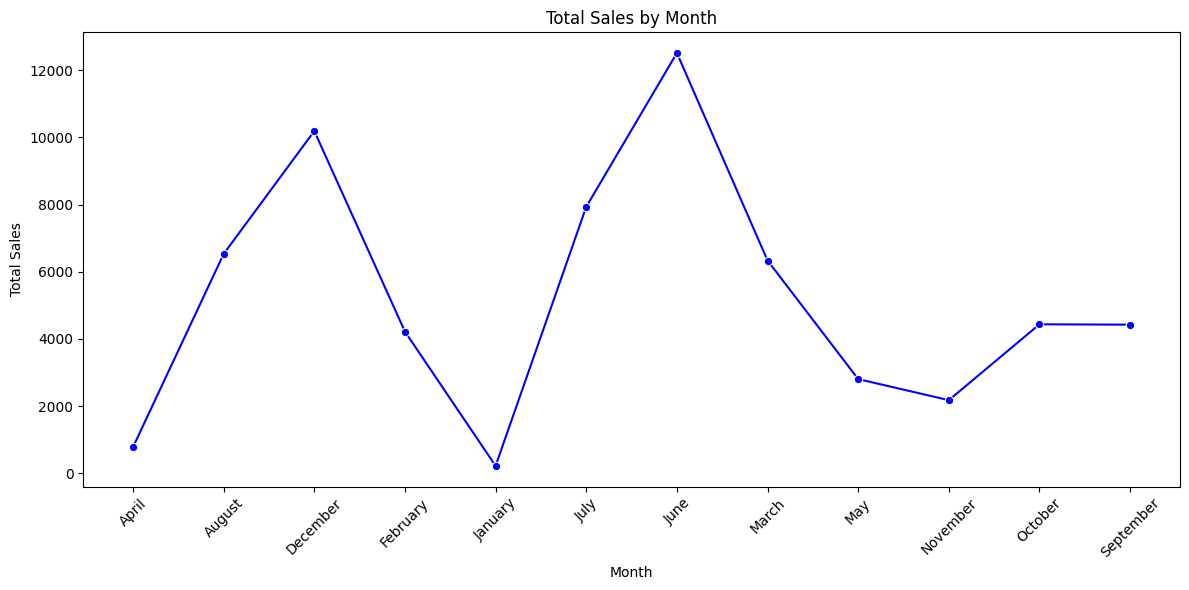

In [57]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = sales_by_month_df.toPandas()

# Create a line plot
plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.lineplot(x='Month', y='Total_Sales', data=pandas_df, marker='o', color='b')

# Add titles and labels
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to fit the labels
plt.tight_layout()

# Show the plot
plt.show()

In [59]:
### Total sales by state
sales_by_state_df = spark.sql("""
    SELECT
        SUM(`Total Sales`) AS Total_Sales,
        State
    FROM Sales
    GROUP BY 2

""")

sales_by_state_df.show()


+-----------+-------------+
|Total_Sales|        State|
+-----------+-------------+
|     3211.0|         Utah|
|       NULL|       Hawaii|
|     7740.0|    Minnesota|
|       NULL|         Ohio|
|       NULL|       Oregon|
|     2738.0|     Arkansas|
|     1366.0|        Texas|
|     4287.0| North Dakota|
|     4271.0| Pennsylvania|
|     5908.0|  Connecticut|
|     9318.0|     Nebraska|
|       NULL|      Vermont|
|       NULL|       Nevada|
|       NULL|   Washington|
|     1659.0|     Illinois|
|    13273.0|     Oklahoma|
|      992.0|     Delaware|
|       NULL|       Alaska|
|       NULL|   New Mexico|
|      560.0|West Virginia|
+-----------+-------------+
only showing top 20 rows



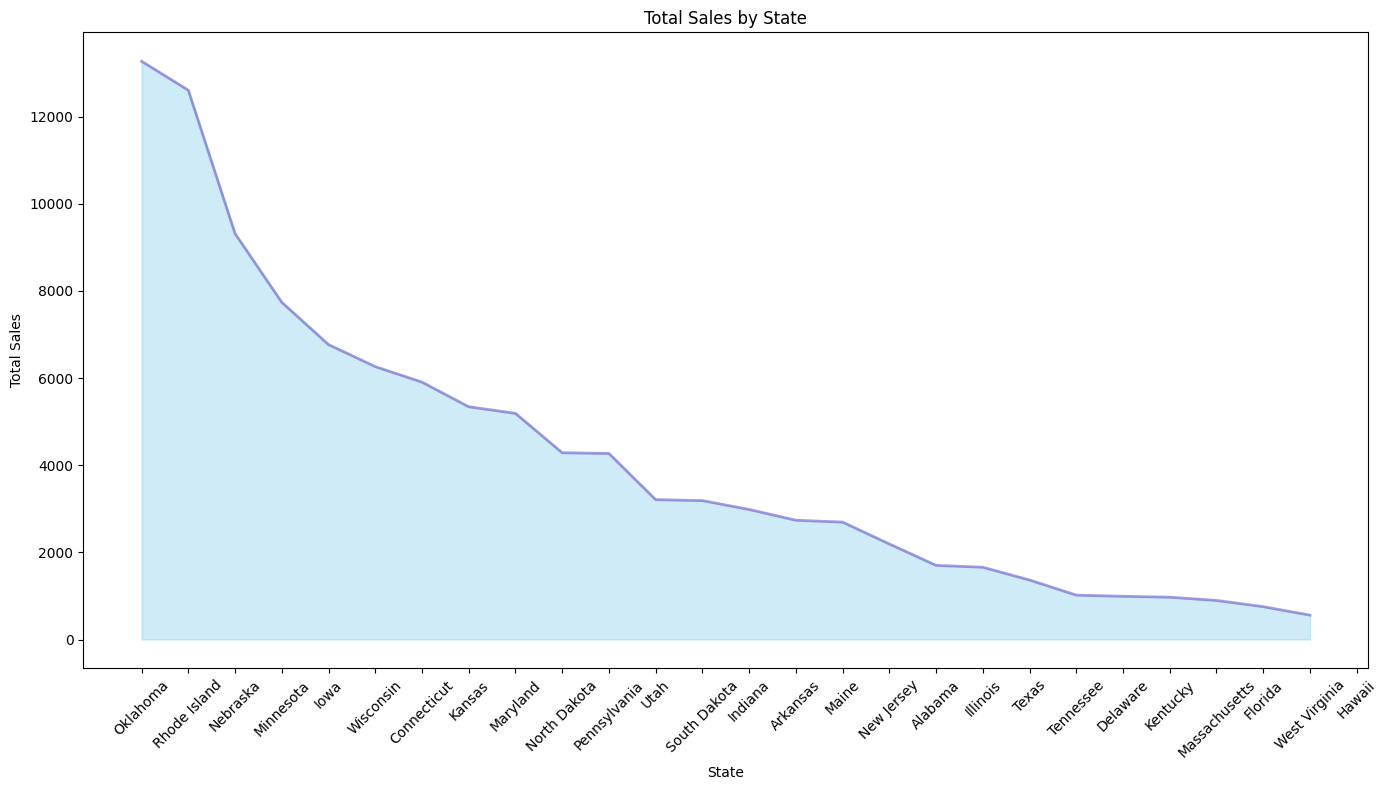

In [60]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = sales_by_state_df.toPandas()

# Ensure the data is sorted by state for better visualization (optional)
pandas_df = pandas_df.sort_values('Total_Sales', ascending=False)

# Create an area plot
plt.figure(figsize=(14, 8))  # Adjust the size as needed
plt.fill_between(pandas_df['State'], pandas_df['Total_Sales'], color="skyblue", alpha=0.4)
plt.plot(pandas_df['State'], pandas_df['Total_Sales'], color="Slateblue", alpha=0.6, linewidth=2)

# Add titles and labels
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Adjust layout to fit the labels
plt.tight_layout()

# Show the plot
plt.show()

In [61]:
### 4. total sales by region
sales_by_region_df = spark.sql("""
    SELECT
        SUM(`Total Sales`) AS Total_Sales,
        Region
    FROM Sales
    GROUP BY 2

""")

sales_by_region_df.show()

+-----------+---------+
|Total_Sales|   Region|
+-----------+---------+
|    47554.0|  Midwest|
|    20098.0|    South|
|     1726.0|Southeast|
|     3211.0|     West|
|    35316.0|Northeast|
+-----------+---------+



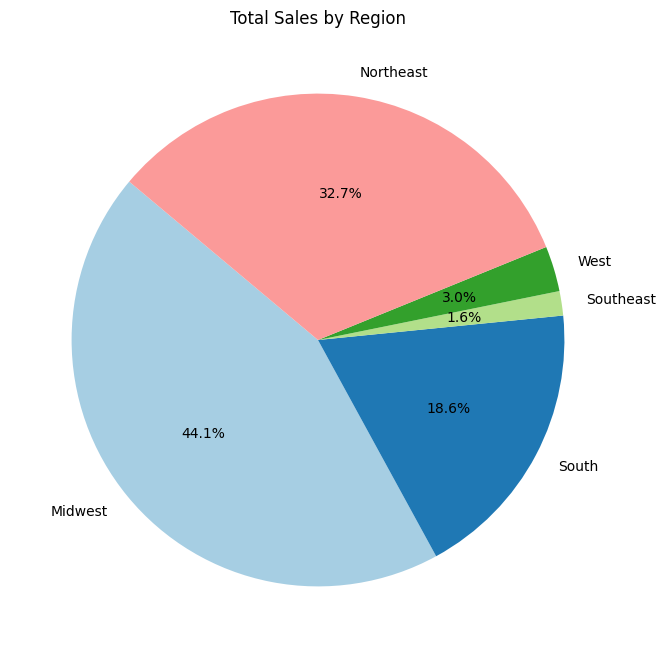

In [62]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = sales_by_region_df.toPandas()

# Create a pie chart
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.pie(pandas_df['Total_Sales'], labels=pandas_df['Region'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(pandas_df))))

# Add title
plt.title('Total Sales by Region')

# Show the plot
plt.show()

In [63]:
### Total sales by product
sales_by_product_df = spark.sql("""
    SELECT
        SUM(`Total Sales`) AS Total_Sales,
        `Product`
    FROM Sales
    GROUP BY 2

""")

sales_by_product_df.show()

+-----------+--------------------+
|Total_Sales|             Product|
+-----------+--------------------+
|     7023.0|Men's Athletic Fo...|
|    62033.0|Women's Athletic ...|
|    13883.0|       Men's Apparel|
|     1862.0|     Women's Apparel|
|    23104.0|Women's Street Fo...|
|       NULL|Men's Street Foot...|
+-----------+--------------------+



<ipython-input-65-1f27bc8b36d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Product', data=pandas_df, palette='viridis')


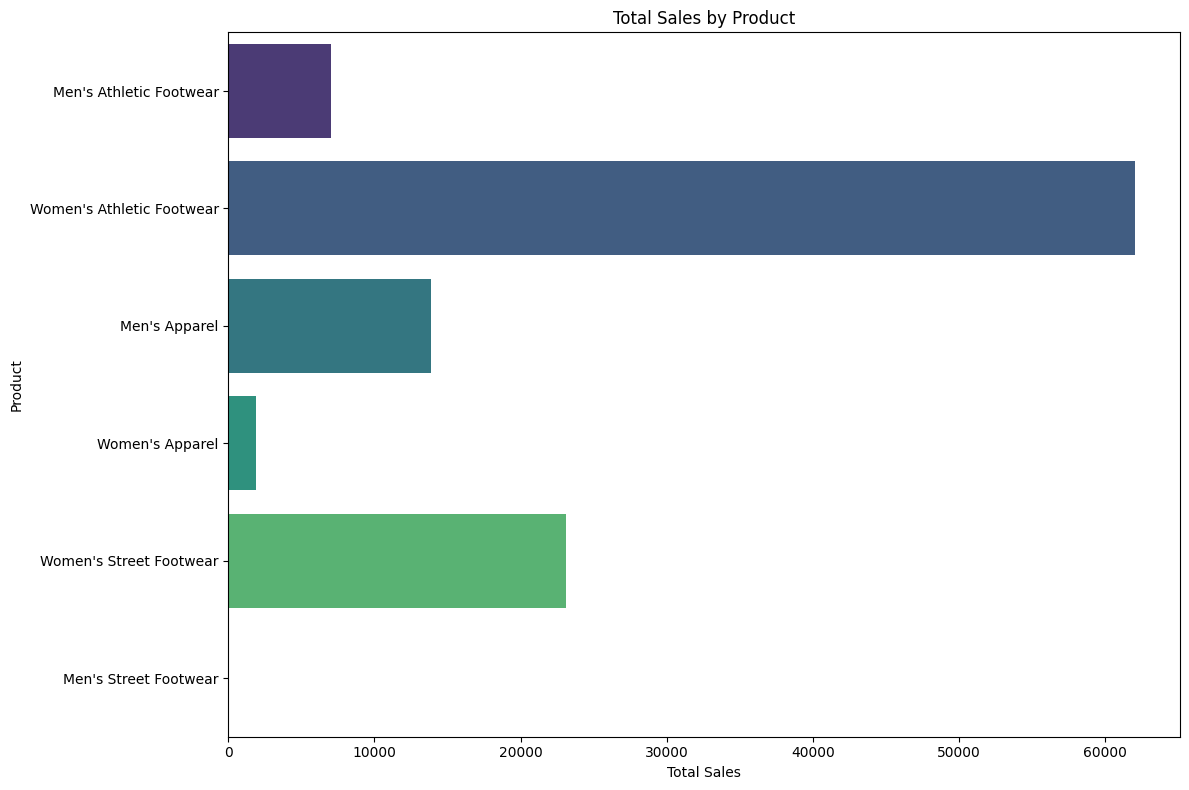

In [65]:
pandas_df = sales_by_product_df.toPandas()

# Create a bar plot
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x='Total_Sales', y='Product', data=pandas_df, palette='viridis')

# Add titles and labels
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')

# Adjust layout to fit the labels
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
### 6. Total sales by retailer
sales_by_retailer_df = spark.sql("""
    SELECT
        SUM(`Total Sales`) AS Total_Sales,
        Retailer
    FROM Sales
    GROUP BY 2

""")

sales_by_retailer_df.show()

+-----------+-------------+
|Total_Sales|     Retailer|
+-----------+-------------+
|     1776.0|      Walmart|
|    50664.0|  Foot Locker|
|    30663.0|    West Gear|
|     8526.0|       Kohl's|
|     5369.0|       Amazon|
|    10907.0|Sports Direct|
+-----------+-------------+



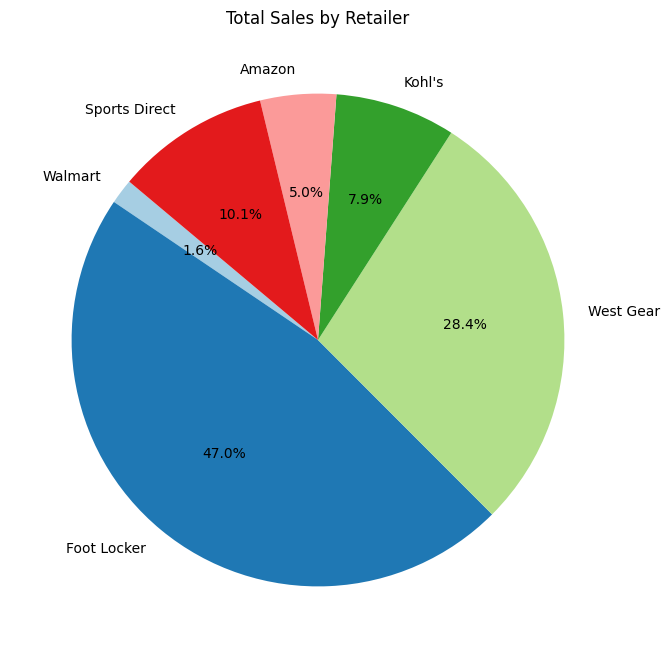

In [67]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = sales_by_retailer_df.toPandas()

# Create a pie chart
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.pie(pandas_df['Total_Sales'], labels=pandas_df['Retailer'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(pandas_df))))

# Add title
plt.title('Total Sales by Retailer')

# Show the plot
plt.show()

In [78]:
### 7. Total Profit by Sales_Method

sales_by_Sales_Method_df = spark.sql("""
    SELECT
    SUM(`Operating Profit`) AS Total_Profit,  `Sales Method`
    FROM Sales
    GROUP BY 2

""")

sales_by_Sales_Method_df.show()


+------------+------------+
|Total_Profit|Sales Method|
+------------+------------+
|        NULL|    In-store|
|    418867.0|      Online|
|    216545.0|      Outlet|
+------------+------------+



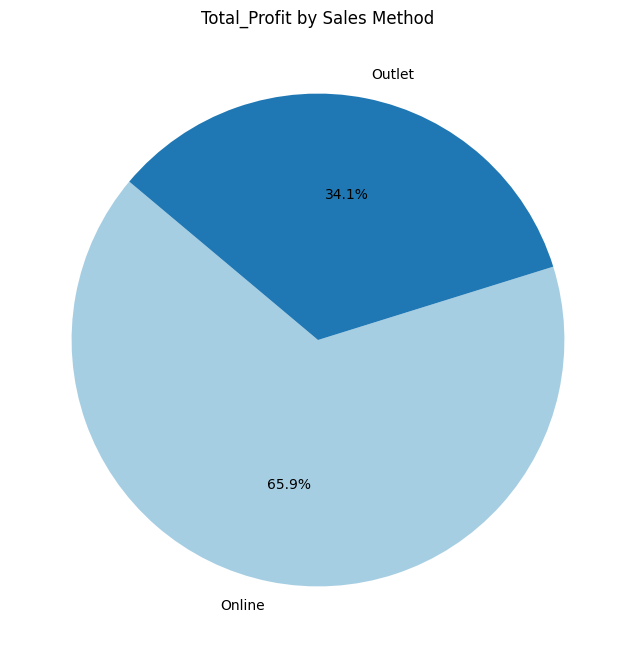

In [82]:

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = sales_by_Sales_Method_df.toPandas()

# Drop rows with NaN values in 'Total_Sales' or 'Sales Method'
pandas_df = pandas_df.dropna(subset=['Total_Profit', 'Sales Method'])

# Check if there are any rows left after dropping NaNs
if pandas_df.empty:
    raise ValueError("DataFrame is empty after dropping NaN values.")

# Create a pie chart
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.pie(pandas_df['Total_Profit'], labels=pandas_df['Sales Method'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(pandas_df))))

# Add title
plt.title('Total_Profit by Sales Method')

# Show the plot
plt.show()

In [76]:
### Total profit by City
sales_by_City_df = spark.sql("""
    SELECT
        SUM(`Operating Profit`) AS Total_Profit,
        City
    FROM Sales
    GROUP BY 2
    Order by 1 desc
    limit 5

""")

sales_by_City_df.show()

+------------+--------------+
|Total_Profit|          City|
+------------+--------------+
|     40190.0|    Providence|
|     37393.0|  Philadelphia|
|     35842.0|        Boston|
|     31313.0|      Portland|
|     30809.0|Salt Lake City|
+------------+--------------+



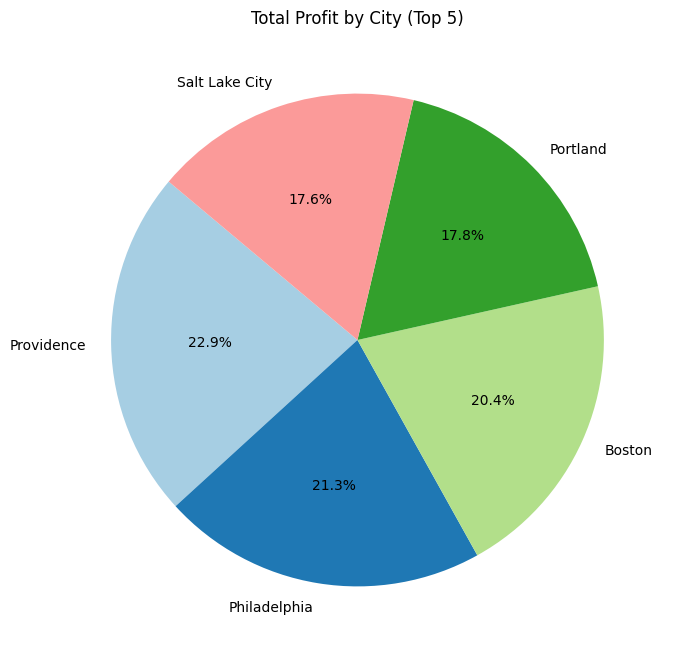

In [77]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = sales_by_City_df.toPandas()

# Check for NaN values and handle them
pandas_df = pandas_df.dropna(subset=['Total_Profit', 'City'])

# Create a pie chart
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.pie(pandas_df['Total_Profit'], labels=pandas_df['City'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(pandas_df))))

# Add title
plt.title('Total Profit by City (Top 5)')

# Show the plot
plt.show()

In [74]:
df.printSchema()

root
 |-- Retailer: string (nullable = true)
 |-- Retailer ID: string (nullable = true)
 |-- Invoice Date: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Price per Unit: string (nullable = true)
 |-- Units Sold: string (nullable = true)
 |-- Total Sales: string (nullable = true)
 |-- Operating Profit: string (nullable = true)
 |-- Operating Margin: string (nullable = true)
 |-- Sales Method: string (nullable = true)

